First just try to open the catalog and follow Aaron's example:

In [78]:
import intake
import xarray as xr

In [79]:
col_url = "/pool/data/Catalogs/dkrz_cmip6_disk.json"

In [80]:
%time col = intake.open_esm_datastore(col_url)
col

/home/a/a270088/miniconda3/envs/gribscan/lib/python3.9/site-packages/intake_esm/utils.py:96: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(catalog_path, **csv_kwargs), catalog_path


CPU times: user 1min 4s, sys: 3.02 s, total: 1min 7s
Wall time: 1min 7s


,unique
activity_id,20
institution_id,39
source_id,103
experiment_id,214
member_id,478
table_id,39
variable_id,1164
grid_label,12
dcpp_init_year,63
version,745


You can acess the data as pandas table:

In [83]:
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,...,frequency,time_reduction,long_name,units,realm,level_type,time_min,time_max,format,uri
0,AerChemMIP,BCC,BCC-ESM1,hist-piAer,r1i1p1f1,AERmon,c2h6,gn,NaN,v20200511,...,mon,mean,C2H6 Volume Mixing Ratio,mol mol-1,aerosol,alevel,185001.0,201412,netcdf,/work/ik1017/CMIP6/data/CMIP6/AerChemMIP/BCC/B...
1,AerChemMIP,BCC,BCC-ESM1,hist-piAer,r1i1p1f1,AERmon,c3h6,gn,NaN,v20200511,...,mon,mean,C3H6 Volume Mixing Ratio,mol mol-1,aerosol,alevel,185001.0,201412,netcdf,/work/ik1017/CMIP6/data/CMIP6/AerChemMIP/BCC/B...
2,AerChemMIP,BCC,BCC-ESM1,hist-piAer,r1i1p1f1,AERmon,c3h8,gn,NaN,v20200511,...,mon,mean,C3H8 Volume Mixing Ratio,mol mol-1,aerosol,alevel,185001.0,201412,netcdf,/work/ik1017/CMIP6/data/CMIP6/AerChemMIP/BCC/B...
3,AerChemMIP,BCC,BCC-ESM1,hist-piAer,r1i1p1f1,AERmon,cdnc,gn,NaN,v20200522,...,mon,mean,Cloud Liquid Droplet Number Concentration,m-3,aerosol,alevel,185001.0,201412,netcdf,/work/ik1017/CMIP6/data/CMIP6/AerChemMIP/BCC/B...
4,AerChemMIP,BCC,BCC-ESM1,hist-piAer,r1i1p1f1,AERmon,ch3coch3,gn,NaN,v20200511,...,mon,mean,CH3COCH3 Volume Mixing Ratio,mol mol-1,aerosol,alevel,185001.0,201412,netcdf,/work/ik1017/CMIP6/data/CMIP6/AerChemMIP/BCC/B...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120752,VolMIP,MPI-M,MPI-ESM1-2-LR,volc-pinatubo-full,r9i1p1f1,fx,mrsofc,gn,NaN,v20190710,...,fx,NaN,Capacity of Soil to Store Water (Field Capacity),kg m-2,land,NaN,NaN,NaN,netcdf,/work/ik1017/CMIP6/data/CMIP6/VolMIP/MPI-M/MPI...
6120753,VolMIP,MPI-M,MPI-ESM1-2-LR,volc-pinatubo-full,r9i1p1f1,fx,orog,gn,NaN,v20190710,...,fx,NaN,Surface Altitude,m,land,NaN,NaN,NaN,netcdf,/work/ik1017/CMIP6/data/CMIP6/VolMIP/MPI-M/MPI...
6120754,VolMIP,MPI-M,MPI-ESM1-2-LR,volc-pinatubo-full,r9i1p1f1,fx,rootd,gn,NaN,v20190710,...,fx,NaN,Maximum Root Depth,m,land,NaN,NaN,NaN,netcdf,/work/ik1017/CMIP6/data/CMIP6/VolMIP/MPI-M/MPI...
6120755,VolMIP,MPI-M,MPI-ESM1-2-LR,volc-pinatubo-full,r9i1p1f1,fx,sftgif,gn,NaN,v20190710,...,fx,NaN,Land Ice Area Percentage,%,land,NaN,NaN,NaN,netcdf,/work/ik1017/CMIP6/data/CMIP6/VolMIP/MPI-M/MPI...


In [81]:
a = col.df['table_id']

This is time frequencies that are available to you. CMIP6 data are defined in tables, and those tables are splitted according to realm and time. For example Amon is monthly mean atmospheric data, Omon - ocean montly data and so on. Tables can be found here: https://github.com/PCMDI/cmip6-cmor-tables/tree/master/Tables

In [84]:
a.unique()

array(['AERmon', 'Amon', 'Emon', 'LImon', 'Lmon', 'Omon', 'SImon',
       'CFday', 'day', 'Oday', 'SIday', 'Ofx', 'AERday', 'AERmonZ',
       'CFmon', 'Eday', 'fx', '3hr', '6hrLev', '6hrPlev', '6hrPlevPt',
       'CF3hr', 'E3hr', 'E3hrPt', 'EdayZ', 'EmonZ', 'Eyr', 'Oclim', 'Oyr',
       'AERhr', 'CFsubhr', 'Esubhr', 'Odec', 'ImonAnt', 'ImonGre', 'Efx',
       'E1hr', 'IfxGre', 'E6hrZ'], dtype=object)

Let's select ocean surface temperature

In [85]:
variable = "tos"
query = dict(
    experiment_id="historical",
    table_id="Omon",
    member_id="r1i1p1f1",
    variable_id=variable,
    # source_id="MPI-ESM1-2-LR", # uncomment to take all models
)
cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,29
source_id,53
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,3
dcpp_init_year,0
version,50


In [86]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,...,frequency,time_reduction,long_name,units,realm,level_type,time_min,time_max,format,uri
0,CMIP,AS-RCEC,TaiESM1,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200630,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,185001.0,185012,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AS-RCEC/Tai...
1,CMIP,AS-RCEC,TaiESM1,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200630,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,185101.0,185112,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AS-RCEC/Tai...
2,CMIP,AS-RCEC,TaiESM1,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200630,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,185201.0,185212,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AS-RCEC/Tai...
3,CMIP,AS-RCEC,TaiESM1,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200630,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,185301.0,185312,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AS-RCEC/Tai...
4,CMIP,AS-RCEC,TaiESM1,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200630,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,185401.0,185412,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/AS-RCEC/Tai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,CMIP,THU,CIESM,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200220,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,185001,189912,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/THU/CIESM/h...
1376,CMIP,THU,CIESM,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200220,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,190001,194912,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/THU/CIESM/h...
1377,CMIP,THU,CIESM,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200220,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,195001,199912,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/THU/CIESM/h...
1378,CMIP,THU,CIESM,historical,r1i1p1f1,Omon,tos,gn,NaN,v20200220,...,mon,mean,Sea Surface Temperature,degC,ocean,NaN,200001,201412,netcdf,/work/ik1017/CMIP6/data/CMIP6/CMIP/THU/CIESM/h...


This is all the models we get:

In [87]:
source_ids = list(cat.df.source_id.unique())
source_ids

['TaiESM1',
 'AWI-CM-1-1-MR',
 'AWI-ESM-1-1-LR',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CAMS-CSM1-0',
 'CAS-ESM2-0',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'IITM-ESM',
 'CanESM5',
 'CMCC-CM2-HR4',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'ACCESS-ESM1-5',
 'ACCESS-CM2',
 'E3SM-1-0',
 'E3SM-1-1',
 'E3SM-1-1-ECA',
 'EC-Earth3',
 'EC-Earth3-AerChem',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FIO-ESM-2-0',
 'MPI-ESM-1-2-HAM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM5A2-INCA',
 'IPSL-CM6A-LR',
 'KIOST-ESM',
 'MIROC6',
 'ICON-ESM-LR',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'GISS-E2-1-G',
 'GISS-E2-1-G-CC',
 'GISS-E2-1-H',
 'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'NorCPM1',
 'NorESM2-LM',
 'NorESM2-MM',
 'KACE-1-0-G',
 'GFDL-CM4',
 'GFDL-ESM4',
 'NESM3',
 'SAM0-UNICON',
 'CIESM',
 'MCM-UA-1-0']

let's select ocean surface temperature first, and just do it for one model:

In [88]:
variable = "tos"
query = dict(
    experiment_id="historical",
    table_id="Omon",
    member_id="r1i1p1f1",
    variable_id=variable,
    source_id="MPI-ESM1-2-LR", # uncomment to take all models
)
cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,1
dcpp_init_year,0
version,1


In [89]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={"chunks": {"time": -1}, "use_cftime": True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


What you get back is a dictionary with all datasets (we only have one at the moment)

In [91]:
list(dset_dict)

['CMIP.MPI-ESM1-2-LR.historical.Omon.gn']

Inside is just an xarray:

In [92]:
dset_dict['CMIP.MPI-ESM1-2-LR.historical.Omon.gn']

<xarray.Dataset>
Dimensions:             (time: 1980, bnds: 2, j: 220, i: 256, vertices: 4,
                         member_id: 1)
Coordinates:
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 213 214 215 216 217 218 219
  * i                   (i) int32 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
    latitude            (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
  * member_id           (member_id) <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object dask.array<chunksize=(240, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
    tos                 (member_id, time, j, i) float32 dask.array<chunksize=(1, 240, 220, 256), meta=np.ndarray>
Attributes: (12/49)
    variant_label:           r1i1p1f1
    title:                   MPI-ESM1-2-LR output prepared for CMIP6
    product:                 model-output
    grid_label:              gn
    external_variables:      areacello
    parent_experiment_id:    piControl
    ...                      ...
    branch_time_in_child:    0.0
    parent_source_id:        MPI-ESM1-2-LR
    parent_activity_id:      CMIP
    parent_variant_label:    r1i1p1f1
    forcing_index:           1
    intake_esm_dataset_key:  CMIP.MPI-ESM1-2-LR.historical.Omon.gn

Let's try to reproduce xmip example from here: https://github.com/jbusecke/xMIP/blob/main/docs/regionmask.ipynb

In [93]:
import regionmask
import intake
import matplotlib.pyplot as plt
from xmip.preprocessing import combined_preprocessing
import xarray as xr
import numpy as np

We only load one model. The preprocess bit here tries to fix things in the model data, that are ether inconsistent with CMIP6 standards, or just wrong :)

In [94]:
# col_url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"
col = intake.open_esm_datastore(col_url)
cat = col.search(source_id=['CAMS-CSM1-0', 
                            # 'CNRM-CM6-1', 'CNRM-ESM2-1', 'ACCESS-CM2', 'ACCESS-ESM1-5', 'EC-Earth3-Veg',
                            # 'MIROC-ES2L', 'MIROC6', 'HadGEM3-GC31-LL', 'UKESM1-0-LL', 'MPI-ESM1-2-HR', 'MRI-ESM2-0',
                            # 'NorCPM1', 'GFDL-CM4', 'GFDL-ESM4', 'NESM3'
                           ],
                 experiment_id='historical', variable_id='thetao')
data_dict = cat.to_dataset_dict(cdf_kwargs={"chunks": {"time": -1}, "use_cftime": True},
                                preprocess=combined_preprocessing)

/home/a/a270088/miniconda3/envs/gribscan/lib/python3.9/site-packages/intake_esm/utils.py:96: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(catalog_path, **csv_kwargs), catalog_path



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.source_id.experiment_id.table_id.grid_label'


OK, we get something back:

In [95]:
data_dict

{'CMIP.CAMS-CSM1-0.historical.Omon.gn': <xarray.Dataset>
 Dimensions:        (member_id: 3, time: 1980, lev: 50, y: 200, x: 360, bnds: 2,
                     vertex: 4)
 Coordinates: (12/13)
   * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
     time_bounds    (time, bnds) object dask.array<chunksize=(180, 2), meta=np.ndarray>
   * lev            (lev) float64 5.0 15.0 25.0 ... 4.587e+03 4.95e+03 5.316e+03
     lev_bounds     (lev, bnds) float64 dask.array<chunksize=(50, 2), meta=np.ndarray>
   * y              (y) int32 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200
   * x              (x) int32 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
     ...             ...
     lon            (y, x) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
     lat_verticies  (y, x, vertex) float32 dask.array<chunksize=(200, 360, 4), meta=np.ndarray>
     lon_verticies  (y, x, vertex) float32 dask.array<chunksize=(200, 360, 4), meta=np.ndarray>
     lon

<GeoAxesSubplot:>

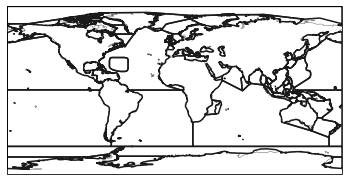

In [96]:
basins = regionmask.defined_regions.natural_earth_v4_1_0.ocean_basins_50
# basins = regionmask.defined_regions.natural_earth.ocean_basins_50
basins.plot(add_ocean=False, add_label=False)

In [97]:
from xmip.regionmask import merged_mask

/home/a/a270088/miniconda3/envs/gribscan/lib/python3.9/site-packages/pygeos/io.py:511: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


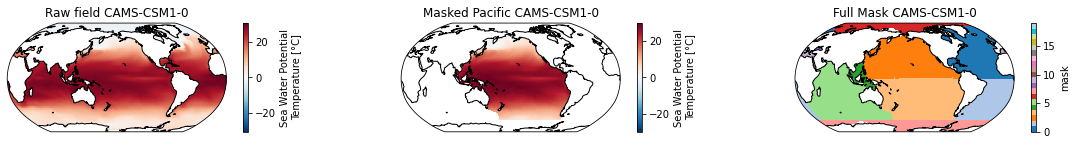

In [98]:
import cartopy.crs as ccrs

for k, ds in data_dict.items():
    if 'lev' in ds.dims:
        model = ds.attrs['source_id']
        if 'member_id' in ds.dims:
            ds = ds.isel(member_id=0)
        ds = ds.thetao.isel(time=0, lev=0).squeeze()

        mask = merged_mask(basins,ds)

        kwargs = dict(x='lon', y='lat', transform = ccrs.PlateCarree(), infer_intervals=False)
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[20,2], subplot_kw={'projection':ccrs.Robinson(190)})
        ds.plot(ax=ax1, **kwargs)
        ax1.set_title(f"Raw field {model}")
        
        ds_masked = ds.where(np.logical_or(np.logical_or(mask == 2, mask==3),mask==4)) # Pacific + Maritime Continent
        ds_masked.plot(ax=ax2, **kwargs)
        ax2.set_title(f"Masked Pacific {model}")
        mask.plot(ax=ax3, cmap='tab20', vmin=0, vmax=19, **kwargs)
        ax3.set_title(f"Full Mask {model}")
        for ax in [ax1, ax2, ax3]:
            ax.coastlines()

Ok, let's have a look more closelly to our data, and try to make a vertical profile of temperature for this particular region:

In [99]:
dataset = data_dict['CMIP.CAMS-CSM1-0.historical.Omon.gn']

We have time dimension

In [100]:
dataset.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

That we can easilly select over (here 10 years):

In [101]:
dataset.sel(time=slice('1850', '1860'))

<xarray.Dataset>
Dimensions:        (member_id: 3, time: 132, lev: 50, y: 200, x: 360, bnds: 2,
                    vertex: 4)
Coordinates: (12/13)
  * time           (time) object 1850-01-16 12:00:00 ... 1860-12-16 12:00:00
    time_bounds    (time, bnds) object dask.array<chunksize=(132, 2), meta=np.ndarray>
  * lev            (lev) float64 5.0 15.0 25.0 ... 4.587e+03 4.95e+03 5.316e+03
    lev_bounds     (lev, bnds) float64 dask.array<chunksize=(50, 2), meta=np.ndarray>
  * y              (y) int32 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200
  * x              (x) int32 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
    ...             ...
    lon            (y, x) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lat_verticies  (y, x, vertex) float32 dask.array<chunksize=(200, 360, 4), meta=np.ndarray>
    lon_verticies  (y, x, vertex) float32 dask.array<chunksize=(200, 360, 4), meta=np.ndarray>
    lon_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 200, 360), meta=np.ndarray>
    lat_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 200, 360), meta=np.ndarray>
  * member_id      (member_id) <U8 'r1i1p1f1' 'r1i1p1f2' 'r2i1p1f1'
Dimensions without coordinates: bnds, vertex
Data variables:
    thetao         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 132, 50, 200, 360), meta=np.ndarray>
Attributes: (12/49)
    variant_label:           r2i1p1f1
    title:                   CAMS-CSM1-0 output prepared for CMIP6
    product:                 model-output
    grid_label:              gn
    external_variables:      areacello volcello
    parent_experiment_id:    piControl
    ...                      ...
    run_variant:             forcing: greenhouse gases,aerosol,solar constant...
    parent_source_id:        CAMS-CSM1-0
    parent_activity_id:      CMIP
    parent_variant_label:    r1i1p1f1
    variable_id:             thetao
    intake_esm_dataset_key:  CMIP.CAMS-CSM1-0.historical.Omon.gn

In [102]:
first10_years = dataset.sel(time=slice('1850', '1860')).mean(dim='time')
first10_years

<xarray.Dataset>
Dimensions:        (member_id: 3, lev: 50, y: 200, x: 360, bnds: 2, vertex: 4)
Coordinates:
  * lev            (lev) float64 5.0 15.0 25.0 ... 4.587e+03 4.95e+03 5.316e+03
    lev_bounds     (lev, bnds) float64 dask.array<chunksize=(50, 2), meta=np.ndarray>
  * y              (y) int32 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200
  * x              (x) int32 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
    lat            (y, x) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lat_verticies  (y, x, vertex) float32 dask.array<chunksize=(200, 360, 4), meta=np.ndarray>
    lon_verticies  (y, x, vertex) float32 dask.array<chunksize=(200, 360, 4), meta=np.ndarray>
    lon_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 200, 360), meta=np.ndarray>
    lat_bounds     (bnds, y, x) float32 dask.array<chunksize=(1, 200, 360), meta=np.ndarray>
  * member_id      (member_id) <U8 'r1i1p1f1' 'r1i1p1f2' 'r2i1p1f1'
Dimensions without coordinates: bnds, vertex
Data variables:
    thetao         (member_id, lev, y, x) float32 dask.array<chunksize=(1, 50, 200, 360), meta=np.ndarray>

This was lazy, so no we have to compute to get the data:

In [103]:
first10_years = first10_years.compute()

And here we go - 10 year mean.

In [104]:
first10_years

<xarray.Dataset>
Dimensions:        (member_id: 3, lev: 50, y: 200, x: 360, bnds: 2, vertex: 4)
Coordinates:
  * lev            (lev) float64 5.0 15.0 25.0 ... 4.587e+03 4.95e+03 5.316e+03
    lev_bounds     (lev, bnds) float64 0.0 10.0 10.0 ... 5.133e+03 5.499e+03
  * y              (y) int32 1 2 3 4 5 6 7 8 ... 193 194 195 196 197 198 199 200
  * x              (x) int32 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
    lat            (y, x) float32 -81.5 -81.5 -81.5 -81.5 ... 66.04 65.63 65.21
    lon            (y, x) float32 80.5 81.5 82.5 83.5 ... 79.86 79.9 79.94 79.98
    lat_verticies  (y, x, vertex) float32 65.0 -81.0 -81.0 ... 65.42 65.0 65.0
    lon_verticies  (y, x, vertex) float32 80.0 80.0 81.0 80.0 ... 80.0 80.0 80.0
    lon_bounds     (bnds, y, x) float32 80.0 80.5 81.0 81.5 ... 79.92 79.96 80.0
    lat_bounds     (bnds, y, x) float32 65.21 65.63 66.04 ... 66.04 65.63 65.21
  * member_id      (member_id) <U8 'r1i1p1f1' 'r1i1p1f2' 'r2i1p1f1'
Dimensions without coordinates: bnds, vertex
Data variables:
    thetao         (member_id, lev, y, x) float32 nan nan nan ... nan nan nan

We have to define a mask:

In [105]:
mask = merged_mask(basins, first10_years)

/home/a/a270088/miniconda3/envs/gribscan/lib/python3.9/site-packages/pygeos/io.py:511: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  arr[:] = geometry


Can try to look at the mask as well, but better plot it with the map as in the earlier example

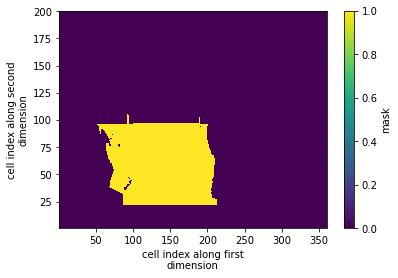

In [108]:
(mask==3).plot()

Mask the data

In [109]:
ds_masked = first10_years.where(np.logical_or(np.logical_or(mask == 2, mask==3),mask==4))

And plot it:

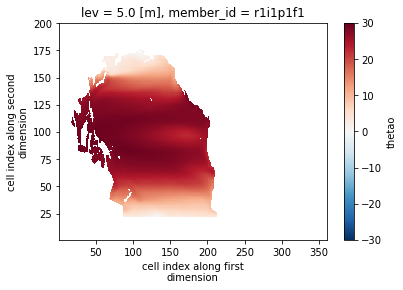

In [110]:
ds_masked.thetao[0,0,:,:].plot()

In [111]:
ds_masked.thetao

<xarray.DataArray 'thetao' (member_id: 3, lev: 50, y: 200, x: 360)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lev        (lev) float64 5.0 15.0 25.0 35.0 ... 4.587e+03 4.95e+03 5.316e+03
  * y          (y) int32 1 2 3 4 5 6 7 8 9 ... 193 194 195 196 197 198 199 200
  * x          (x) int32 1 2 3 4 5 6 7 8 9 ... 353 354 355 356 357 358 359 360
    lat        (y, x) float32 -81.5 -81.5 -81.5 -81.5 ... 66.04 65.63 65.21
    lon        (y, x) float32 80.5 81.5 82.5 83.5 ... 79.86 79.9 79.94 79.98
  * member_id  (member_id) <U8 'r1i1p1f1' 'r1i1p1f2' 'r2i1p1f1'

So we can do a mean over region now and plot:

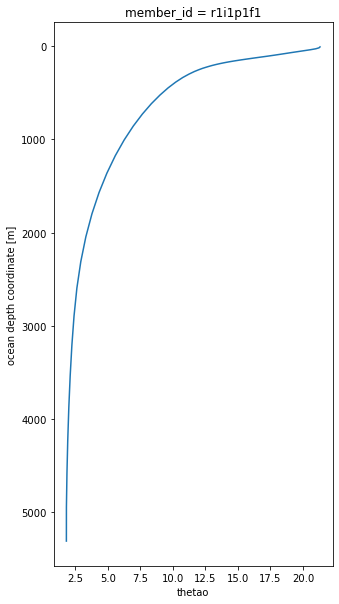

In [112]:
ds_masked.thetao[0,:,:,:].mean(dim=['y', 'x']).plot(y='lev', figsize=(5, 10))
plt.gca().invert_yaxis()

Plotting without mask for control:

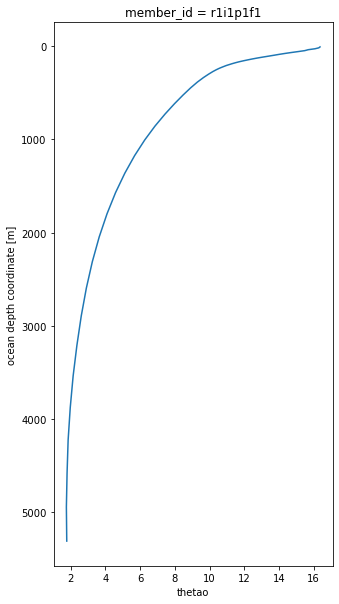

In [113]:
first10_years.thetao[0,:,:,:].mean(dim=['y', 'x']).plot(y='lev', figsize=(5, 10))
plt.gca().invert_yaxis()